In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [205]:
df = pd.read_csv(r'C:\Users\AMAN SHUKLA\Downloads\employee_experience_survey_data.csv')

In [206]:
df.head()

,Name,Age Bracket,Gender,Ethnicity,Job Title,Department,Date Survey Completed,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
0,John Doe,25-34,Female,Asian,Product Manager,Product Development,2024-10-05,Disagree,Strongly Agree,Neutral,Neutral,Neutral,Disagree,Agree,Strongly Agree,Strongly Agree,Agree,Strongly Agree
1,Jane Smith,18-24,Female,Middle Eastern,Operations Manager,Sales,2024-10-07,Agree,Strongly Disagree,Strongly Agree,Neutral,Neutral,Disagree,Neutral,Neutral,Neutral,Agree,Neutral
2,Carlos Reyes,45-54,Female,Indian,UX Designer,Consulting,2024-10-08,Neutral,Strongly Disagree,Agree,Disagree,Strongly Agree,Agree,Agree,Strongly Disagree,Neutral,Strongly Agree,Strongly Agree
3,Emily Zhang,35-44,Male,Caucasian,UX Designer,HR,2024-10-07,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Strongly Agree,Agree,Strongly Disagree,Strongly Disagree,Agree,Neutral
4,Michael Johnson,18-24,Female,Caucasian,UX Designer,Product Development,2024-10-07,Agree,Strongly Agree,Disagree,Neutral,Strongly Disagree,Disagree,Disagree,Disagree,Strongly Disagree,Neutral,Disagree


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Name                              15 non-null     object
 1   Age Bracket                       15 non-null     object
 2   Gender                            15 non-null     object
 3   Ethnicity                         15 non-null     object
 4   Job Title                         15 non-null     object
 5   Department                        15 non-null     object
 6   Date Survey Completed             15 non-null     object
 7   Job Satisfaction                  15 non-null     object
 8   Work-Life Balance                 15 non-null     object
 9   Management Support                15 non-null     object
 10  Team Collaboration                15 non-null     object
 11  Workload Fairness                 15 non-null     object
 12  Career Development Oppor

In [208]:
df.dtypes

Name                                object
Age Bracket                         object
Gender                              object
Ethnicity                           object
Job Title                           object
Department                          object
Date Survey Completed               object
Job Satisfaction                    object
Work-Life Balance                   object
Management Support                  object
Team Collaboration                  object
Workload Fairness                   object
Career Development Opportunities    object
Workplace Inclusivity               object
Company Communication               object
Compensation Satisfaction           object
Job Security                        object
Overall Engagement                  object
dtype: object

In [209]:
df['Overall Engagement'].unique()

array(['Strongly Agree', 'Neutral', 'Disagree', 'Agree',
       'Strongly Disagree'], dtype=object)

In [210]:
df.replace({'Strongly Disagree': 1, 'Disagree' : 2 , 'Neutral' : 3 , 'Agree' : 4 , 'Strongly Agree' : 5},inplace = True)

# Descriptive Statistics:
Provide a summary of the dataset using descriptive statistics (e.g., mean, median, mode, standard deviation) for Overall Engagement and Job Satisfaction.

In [211]:
df.describe()

,Job Satisfaction,Work-Life Balance,Management Support,Team Collaboration,Workload Fairness,Career Development Opportunities,Workplace Inclusivity,Company Communication,Compensation Satisfaction,Job Security,Overall Engagement
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,3.000000,3.333333,2.800000,2.866667,3.266667,3.066667,3.466667,2.933333,2.733333,3.400000,3.400000
std,1.309307,1.676163,1.521278,1.407463,1.533747,1.437591,1.060099,1.533747,1.099784,1.242118,1.298351
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.500000,1.000000,1.500000,2.500000,2.000000,3.000000,1.500000,2.000000,3.000000,2.500000
50%,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.500000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [212]:
mode_job_satisfaction = df['Job Satisfaction'].mode()
mode_response = df['Overall Engagement'].mode()

In [213]:
mode_response

0    3
1    5
Name: Overall Engagement, dtype: int64

In [214]:
mode_job_satisfaction

0    2
1    4
Name: Job Satisfaction, dtype: int64

Identify any key trends in the survey results. For example:
Are employees in a certain age bracket or department more satisfied than others?


In [216]:
df.groupby(['Age Bracket', 'Department'])[['Job Satisfaction']].mean()

Job Satisfaction
Age Bracket Department                           
18-24       Design                            5.0
            Finance                           4.0
            Product Development               3.0
            Sales                             3.0
25-34       HR                                5.0
            Product Development               2.0
            Sales                             2.0
35-44       HR                                3.0
            IT                                1.0
45-54       Consulting                        3.0
            Operations                        2.0

Does any demographic group (age, gender, ethnicity) show patterns in certain areas (e.g., Work-Life Balance or Compensation Satisfaction)?

In [217]:
grouped_df = df.groupby(['Age Bracket', 'Gender', 'Ethnicity'])[['Work-Life Balance', 'Compensation Satisfaction']].mean()

In [218]:
grouped_df

Work-Life Balance   
Age Bracket Gender Ethnicity                             
18-24       Female Caucasian                       5.0  \
                   Hispanic                        1.0   
                   Indian                          2.0   
                   Middle Eastern                  2.5   
            Male   African American                4.5   
25-34       Female Asian                           5.0   
                   Middle Eastern                  4.0   
            Male   Caucasian                       5.0   
35-44       Female Indian                          5.0   
            Male   Caucasian                       4.0   
45-54       Female Indian                          1.0   
            Male   Asian                           3.0   
                   Middle Eastern                  1.0   

                                     Compensation Satisfaction  
Age Bracket Gender Ethnicity                                    
18-24       Female Caucasian                               1.0  
                   Hispanic                                3.0  
                   Indian                                  3.0  
                   Middle Eastern                          2.5  
            Male   African American                        2.5  
25-34       Female Asian                                   5.0  
                   Middle Eastern                          2.0  
            Male   Caucasian                               3.0  
35-44       Female Indian                                  4.0  
            Male   Caucasian                               1.0  
45-54       Female Indian                                  3.0  
            Male   Asian                                   2.0  
                   Middle Eastern                          4.0

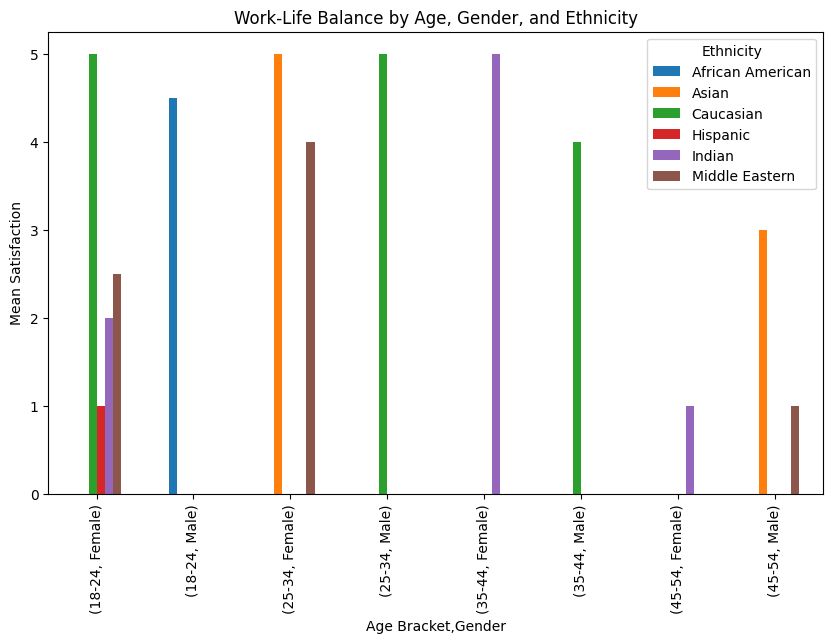

In [219]:
grouped_df['Work-Life Balance'].unstack().plot(kind='bar', figsize=(10, 6))
plt.title('Work-Life Balance by Age, Gender, and Ethnicity')
plt.ylabel('Mean Satisfaction')
plt.show()

# Inferential Statistics:
Conduct a hypothesis test to see if there's a statistically significant difference in Job Satisfaction between two specific departments (e.g. IT and HR). State your null hypothesis, test method (e.g., t-test), and explain your results.

In [220]:
hr_satisfaction = df[df['Department']=='HR']['Job Satisfaction']

In [221]:
it_satisfaction = df[df['Department'] == 'IT'][ 'Job Satisfaction']

In [222]:
t_stat, p_value = stats.ttest_ind( hr_satisfaction, it_satisfaction)

In [223]:
print(f"T-statistic:{t_stat}")
print(f"P-value:{p_value}")

T-statistic:1.7320508075688774
P-value:0.33333333333333326


In [224]:
#conclusion
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis : there is a significant difference in job satisfaction between IT and HR.")
else:
    print("Fail to reject the null hypothesis: No significant difference in job satisfaction between IT and HR.")

Fail to reject the null hypothesis: No significant difference in job satisfaction between IT and HR.


Perform a correlation analysis to determine if there is any relationship between Work-Life Balance and Overall Engagement. Interpret the correlation coefficient and explain what it means in the context of employee experience.

In [150]:
newdf  =  df.drop(["Name", "Age Bracket", "Gender", "Ethnicity", "Job Title", "Department","Date Survey Completed"], axis =  'columns')

In [225]:
corr = newdf.corr()

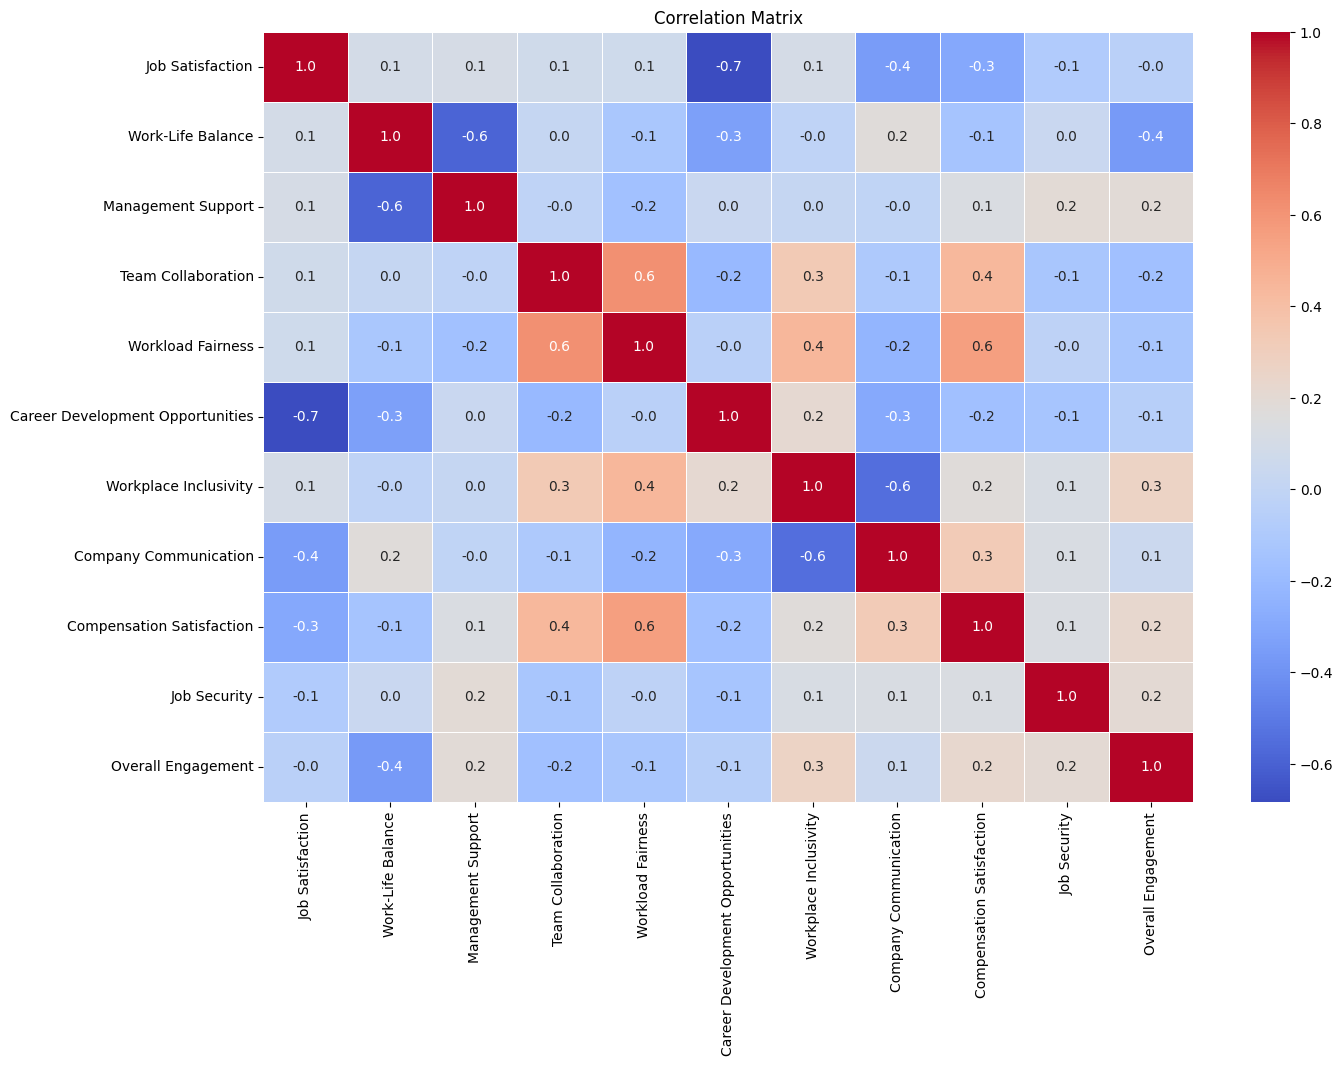

In [226]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()